In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
from torchvision import transforms
import os
import cv2
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from model import Model
import numpy as np
from numba import jit, cuda
from sklearn.model_selection import train_test_split
#

trainPath = '/content/drive/MyDrive/Data/handPostures'
trainLabelsPath = '/content/drive/MyDrive/Data/train.txt'

#testpath = 'testset'
#testLabelsPath = "test.txt"

# load training set
training_data = Model.load_images(trainPath)
train_labels = Model.load_labels(trainLabelsPath)
#mnist_trainset = Model.load_labels_to_images(training_data, train_labels)


#test_data = Model.load_images(testpath)
#test_labels = Model.load_labels(testLabelsPath)
#mnist_testset = Model.load_labels_to_images(test_data, test_labels)


#mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
#mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))



#print(mnist_trainset)
mnist_trainset, mnist_testset, train_labels, test_labels = train_test_split(training_data, train_labels, test_size=0.1, random_state=1, stratify=train_labels)
mnist_trainset, mnist_valset, train_labels, val_labels = train_test_split(mnist_trainset, train_labels, test_size=0.11, random_state=1, stratify=train_labels)
mnist_trainset = Model.load_labels_to_images_with_augmentation(mnist_trainset, train_labels)
mnist_testset = Model.load_labels_to_images(mnist_testset, test_labels)
mnist_valset = Model.load_labels_to_images(mnist_valset, val_labels)
#mnist_valset=mnist_testset
#mnist_trainset, mnist_valset, mnist_testset = torch.utils.data.random_split(mnist_trainset, [int(0.8 * len(mnist_trainset)), int(0.1 * len(mnist_trainset)), int(0.1 * len(mnist_trainset))])

train_dataloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(mnist_valset, batch_size=32, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(mnist_testset, batch_size=32, shuffle=False)

print("Training dataset size: ", len(mnist_trainset))
print("Validation dataset size: ", len(mnist_valset))
print("Testing dataset size: ", len(mnist_testset))
a=0
b=0
c=0
d=0
e=0
f=0
g=0
h=0
k=0
j=0
for i in range(200):
  if (mnist_testset[i][1]==1):
    a+=1
  elif (mnist_testset[i][1]==2):
    b+=1
  elif (mnist_testset[i][1]==3):
    c+=1
  elif (mnist_testset[i][1]==4):
    d+=1
  elif (mnist_testset[i][1]==5):
    e+=1
  elif (mnist_testset[i][1]==6):
    f+=1
  elif (mnist_testset[i][1]==7):
    g+=1
  elif (mnist_testset[i][1]==8):
    h+=1
  elif (mnist_testset[i][1]==9):
    k+=1
  elif (mnist_testset[i][1]==10):
    j+=1
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)
print(h)
print(k)
print(j)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


10
10
10
10
10
10
10
10
10
2
2
2
2
2
2
2
2
2
2
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


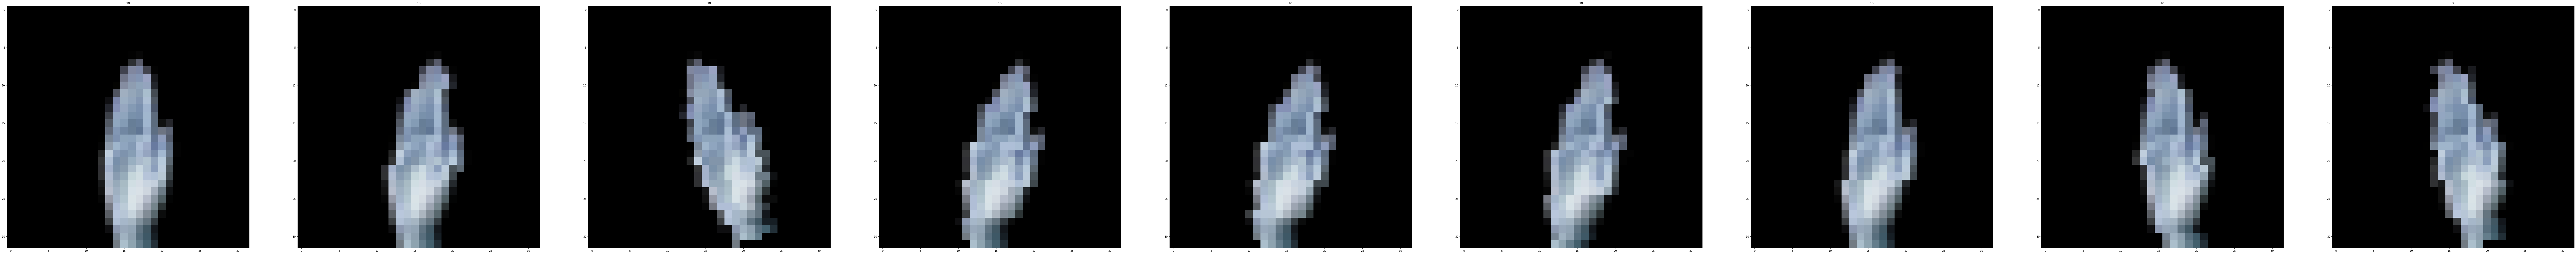

In [ ]:
fig1=plt.figure(figsize=(200, 200))
for i in range(1, 10):
    img = transforms.ToPILImage(mode='RGB')(mnist_trainset[i+10][0])
    fig1.add_subplot(1, 10, i)
    plt.title(mnist_trainset[i+1][1])
    plt.imshow(img)
for i in range(1, 40):
    print(mnist_trainset[i][1])
plt.show()


5
5
2
6
10
10
2
10
4
10
8
9
4


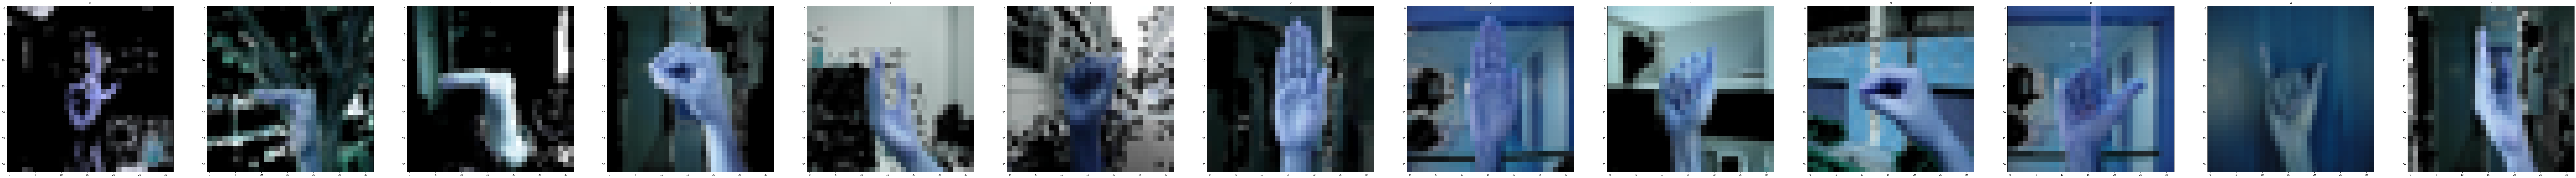

In [ ]:
fig2=plt.figure(figsize=(200, 200))
for i in range(1, 14):
    img = transforms.ToPILImage(mode='RGB')(mnist_testset[i][0])
    fig2.add_subplot(1, 14, i)
    plt.title(mnist_testset[i][1])
    plt.imshow(img)
for i in range(1, 14):
    print(mnist_valset[i][1])
plt.show()



Epoch: 1/100, Train Loss: 1.83578338, Val Loss: 1.21772950, Val Accuracy: 0.59595960

Epoch: 2/100, Train Loss: 1.14633011, Val Loss: 0.89061293, Val Accuracy: 0.73232323
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.89061293

Epoch: 3/100, Train Loss: 0.87354792, Val Loss: 0.69808283, Val Accuracy: 0.76767677
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.69808283

Epoch: 4/100, Train Loss: 0.71797453, Val Loss: 0.62126549, Val Accuracy: 0.80808081
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.62126549

Epoch: 5/100, Train Loss: 0.62209807, Val Loss: 0.53396530, Val Accuracy: 0.81313131
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.53396530

Epoch: 6/100, Train Loss: 0.56581001, Val Loss: 0.47155516, Val Accuracy: 0.84343434
Saving the model state dictionary for Epoch: 6 with Validation loss: 0.47155516

Epoch: 7/100, Train Loss: 0.50086041, Val Loss: 0.44779127, Val Accuracy: 0.8383838

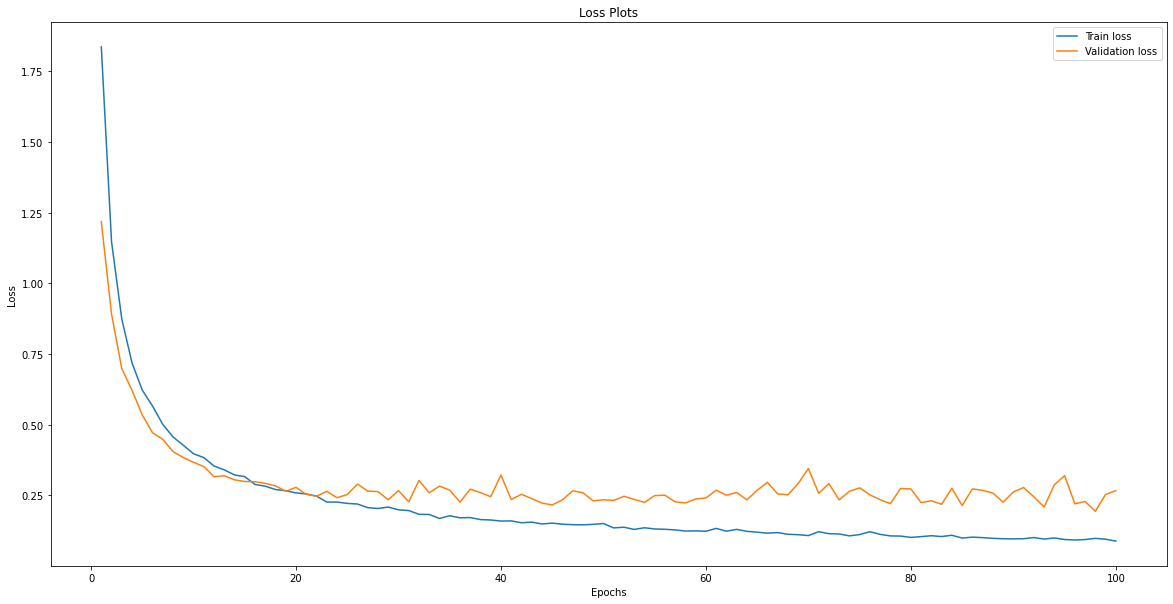

Test accuracy 0.96000000


In [ ]:
model = Model()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

if (torch.cuda.is_available()):
    model.cuda()

no_epochs = 100
train_loss = list()
val_loss = list()
best_val_loss = 1
for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # validation
    model.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(mnist_valset)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")

fig=plt.figure(figsize=(20, 10))
plt.plot(np.arange(1, no_epochs+1), train_loss, label="Train loss")
plt.plot(np.arange(1, no_epochs+1), val_loss, label="Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Plots")
plt.legend(loc='upper right')
plt.show()

# test model
model.load_state_dict(torch.load("model.dth"))
model.eval()

results = list()
total = 0
for itr, (image, label) in enumerate(test_dataloader):

    if (torch.cuda.is_available()):
        image = image.cuda()
        label = label.cuda()

    pred = model(image)
    pred = torch.nn.functional.softmax(pred, dim=1)
    
    for i, p in enumerate(pred):
        if label[i] == torch.max(p.data, 0)[1]:
            total = total + 1
            results.append((image, torch.max(p.data, 0)[1]))
test_accuracy = total / len(mnist_testset)
print('Test accuracy {:.8f}'.format(test_accuracy))



Test accuracy 0.96000000


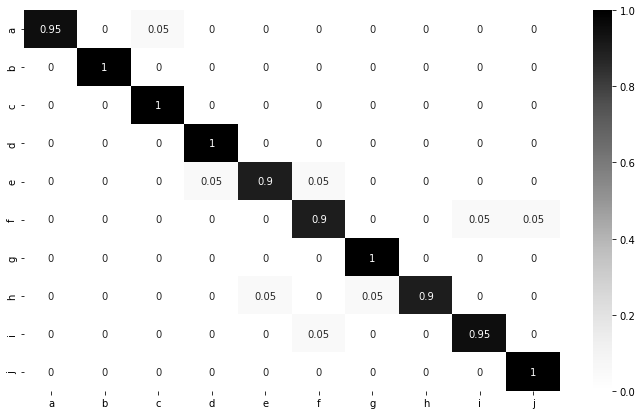

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
model.load_state_dict(torch.load("model.dth"))
model.eval()

results = list()
total = 0
labels=[]
prediction=[]
for itr, (image, label) in enumerate(test_dataloader):

    if (torch.cuda.is_available()):
        image = image.cuda()
        label = label.cuda()

    pred = model(image)
    pred = torch.nn.functional.softmax(pred, dim=1)
    #preds=(torch.max(pred.data, 0)[1]).detach().numpy()
    #prediction.extend(preds)

    lab=(label.detach().cpu()).numpy()
    labels.extend(label)


    #print(lab)
    #print("ss")
    #print(preds)
    #print(lab)
    classes = ('a', 'b', 'c', 'd', 'e',
        'f', 'g', 'h', 'i', 'j')
    
    for i, p in enumerate(pred):

        preds=((torch.max(p.data, 0)[1]).detach().cpu()).numpy()

        #T=torch.cat((T,(torch.max(p.data, 0)[1])),1)
        #print(preds)
        prediction.append(preds)
        if label[i] == torch.max(p.data, 0)[1]:
            #print(label[i])
            #print(torch.max(p.data, 0)[1])
            #print(total)
            #print(itr)
            total = total + 1
            results.append((image, torch.max(p.data, 0)[1]))
test_accuracy = total / len(mnist_testset)
print('Test accuracy {:.8f}'.format(test_accuracy))
# Build confusion matrix
cf_matrix = confusion_matrix(labels, prediction)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True, cmap="Greys")
plt.savefig('output.png')

In [ ]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
conv_1.weight 	 torch.Size([15, 3, 6, 6])
conv_1.bias 	 torch.Size([15])
conv_2.weight 	 torch.Size([30, 15, 3, 3])
conv_2.bias 	 torch.Size([30])
linear_1.weight 	 torch.Size([11, 1470])
linear_1.bias 	 torch.Size([11])


In [ ]:

print(pred) 
print("stay /n")
print(prediction)


tensor([[2.0288e-21, 8.3095e-07, 4.2249e-11, 3.9622e-12, 4.5782e-08, 4.3378e-10,
         9.5143e-09, 1.0011e-14, 5.8664e-11, 1.0000e+00, 2.8971e-08],
        [1.7248e-23, 4.9874e-10, 5.4537e-16, 2.6522e-15, 3.0674e-05, 3.1105e-12,
         7.7073e-07, 4.4952e-12, 2.4262e-11, 2.3945e-04, 9.9973e-01],
        [5.3601e-27, 1.1986e-07, 1.0858e-12, 4.8230e-07, 9.6703e-06, 2.9424e-06,
         3.9507e-19, 9.9999e-01, 2.1597e-10, 4.9452e-11, 3.9884e-14],
        [7.2010e-19, 5.9070e-14, 1.2030e-06, 1.4428e-04, 3.7348e-04, 8.1412e-05,
         7.4992e-13, 9.9940e-01, 1.2643e-08, 2.3594e-14, 2.0825e-15],
        [2.3200e-28, 3.6881e-12, 5.3303e-15, 2.2929e-11, 4.8887e-09, 1.8424e-14,
         9.9998e-01, 6.6181e-13, 2.4663e-13, 1.7694e-05, 7.2067e-14],
        [3.4272e-22, 5.0348e-09, 7.2990e-10, 2.7019e-04, 3.1189e-05, 9.9850e-01,
         7.4200e-09, 1.9886e-07, 1.1321e-03, 7.0052e-05, 1.1611e-10],
        [6.6048e-19, 2.9723e-09, 1.1840e-11, 4.8833e-10, 2.3581e-06, 1.7003e-09,
         4.57